# Ratings Histogram

In this notebook we use PySpark to get the ratings histogram of the Movielens data set. 

First we call the some libraries and tell the computer that we are going to run our script on our local syste

In [1]:
from pyspark import SparkConf, SparkContext
import pandas as pd
import matplotlib.pyplot as plt

conf = SparkConf().setMaster('local').setAppName('ratings_histogram')
sc = SparkContext(conf = conf)

We load our data file into a Resilient Distributed Dataset (RDD) object 

In [2]:
lines = sc.textFile('datasets/ml-100k/u.data')

We extract the ratings column form the data and create a new RDD, named ratings, that contains only the rating values

In [3]:
ratings = lines.map(lambda x: x.split()[2])

We preform an action, on the RDD that contains the ratings, that counts how many times each rating occurs

In [4]:
frequencies = ratings.countByValue()
frequencies = dict(sorted(frequencies.items()))

Finally, let's plot the information that we just got form our data set

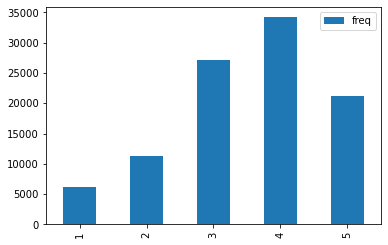

In [5]:
histogram = pd.DataFrame.from_dict(frequencies, orient='index',columns=['freq'])
histogram.plot(kind='bar',y='freq')